## Importer les bibliothèques nécessaires

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests
import streamlit as st

## Charger les données

In [152]:
# Lire les données depuis un fichier CSV avec ';' comme séparateur
# URL du dataset
url = "https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=csv&timezone=Europe/Berlin&lang=fr"

# Télécharger le contenu du fichier CSV
response = requests.get(url)
data = response.content.decode('utf-8')

# Charger les données dans un DataFrame pandas
df = pd.read_csv(StringIO(data), delimiter=';')

# Afficher les premières lignes du DataFrame
df.head()

,stationcode,name,is_installed,capacity,numdocksavailable,numbikesavailable,mechanical,ebike,is_renting,is_returning,duedate,coordonnees_geo,nom_arrondissement_communes,code_insee_commune
0,16107,Benjamin Godard - Victor Hugo,OUI,35,34,0,0,0,OUI,OUI,2024-06-15T15:48:57+02:00,"48.865983,2.275725",Paris,NaN
1,32304,Charcot - Benfleet,NON,0,0,0,0,0,NON,NON,2024-03-29T10:30:37+01:00,"48.878370277021,2.440523876268",Romainville,NaN
2,9020,Toudouze - Clauzel,OUI,21,17,4,1,3,OUI,OUI,2024-06-15T15:48:20+02:00,"48.87929591733507,2.3373600840568547",Paris,NaN
3,44015,Rouget de L'isle - Watteau,OUI,20,5,14,0,14,OUI,OUI,2024-06-15T15:51:41+02:00,"48.778192750803,2.3963020229163",Vitry-sur-Seine,NaN
4,14111,Cassini - Denfert-Rochereau,OUI,25,19,6,5,1,OUI,OUI,2024-06-15T15:47:47+02:00,"48.837525839067,2.3360354080796",Paris,NaN


## Exploration initiale des données

#### Aperçu des données

In [153]:
#Afficher le nb de lignes et colonnes
df.shape
print(f"Le DataFrame contient {df.shape[1]} colonnes et {df.shape[0]} lignes.")

Le DataFrame contient 14 colonnes et 1485 lignes.


In [154]:
# Afficher les informations générales sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stationcode                  1485 non-null   object 
 1   name                         1485 non-null   object 
 2   is_installed                 1485 non-null   object 
 3   capacity                     1485 non-null   int64  
 4   numdocksavailable            1485 non-null   int64  
 5   numbikesavailable            1485 non-null   int64  
 6   mechanical                   1485 non-null   int64  
 7   ebike                        1485 non-null   int64  
 8   is_renting                   1485 non-null   object 
 9   is_returning                 1485 non-null   object 
 10  duedate                      1485 non-null   object 
 11  coordonnees_geo              1485 non-null   object 
 12  nom_arrondissement_communes  1485 non-null   object 
 13  code_insee_commune

In [155]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
capacity,1485.0,31.045118,13.302969,0.0,22.0,29.0,37.0,200.0
numdocksavailable,1485.0,19.047138,13.966525,0.0,8.0,19.0,27.0,200.0
numbikesavailable,1485.0,11.299663,12.877289,0.0,2.0,6.0,17.0,70.0
mechanical,1485.0,7.223569,10.160829,0.0,0.0,2.0,11.0,63.0
ebike,1485.0,4.076094,4.981394,0.0,1.0,2.0,5.0,54.0
code_insee_commune,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Détection des valeurs manquantes

In [156]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Valeurs manquantes par colonne : "),  print(missing_values)
print("\n\n")
print("Valeurs manquantes en pourcentages :"), print(missing_percentage)


Valeurs manquantes par colonne : 
stationcode                       0
name                              0
is_installed                      0
capacity                          0
numdocksavailable                 0
numbikesavailable                 0
mechanical                        0
ebike                             0
is_renting                        0
is_returning                      0
duedate                           0
coordonnees_geo                   0
nom_arrondissement_communes       0
code_insee_commune             1485
dtype: int64



Valeurs manquantes en pourcentages :
stationcode                      0.0
name                             0.0
is_installed                     0.0
capacity                         0.0
numdocksavailable                0.0
numbikesavailable                0.0
mechanical                       0.0
ebike                            0.0
is_renting                       0.0
is_returning                     0.0
duedate                          0.0
co

(None, None)

## Gestion des valeurs manquantes

In [157]:
#On supprime la colonne code insee commune qui ne contient que des valeurs vides et ne contient pas d'éléments nécessaires au bon fonctionnement.
df.drop(columns=['code_insee_commune'], inplace=True)
df.head()

,stationcode,name,is_installed,capacity,numdocksavailable,numbikesavailable,mechanical,ebike,is_renting,is_returning,duedate,coordonnees_geo,nom_arrondissement_communes
0,16107,Benjamin Godard - Victor Hugo,OUI,35,34,0,0,0,OUI,OUI,2024-06-15T15:48:57+02:00,"48.865983,2.275725",Paris
1,32304,Charcot - Benfleet,NON,0,0,0,0,0,NON,NON,2024-03-29T10:30:37+01:00,"48.878370277021,2.440523876268",Romainville
2,9020,Toudouze - Clauzel,OUI,21,17,4,1,3,OUI,OUI,2024-06-15T15:48:20+02:00,"48.87929591733507,2.3373600840568547",Paris
3,44015,Rouget de L'isle - Watteau,OUI,20,5,14,0,14,OUI,OUI,2024-06-15T15:51:41+02:00,"48.778192750803,2.3963020229163",Vitry-sur-Seine
4,14111,Cassini - Denfert-Rochereau,OUI,25,19,6,5,1,OUI,OUI,2024-06-15T15:47:47+02:00,"48.837525839067,2.3360354080796",Paris


## GroupBy avec Comptage 

In [159]:
# GroupBy par ville avec comptage des stations en fonctionnement
count_df = df[df['is_installed'] == 'OUI'].groupby('nom_arrondissement_communes').size().reset_index(name='Nombre de station en fonctionnement')

print("Nombre de stations en fonctionnement par ville:")
print(count_df)

Nombre de stations en fonctionnement par ville:
   nom_arrondissement_communes  Nombre de station en fonctionnement
0                  Alfortville                                    5
1                      Arcueil                                    4
2                   Argenteuil                                    6
3           Asnières-sur-Seine                                   12
4                Aubervilliers                                   13
..                         ...                                  ...
58               Ville-d'Avray                                    1
59                   Villejuif                                   11
60       Villeneuve-la-Garenne                                    2
61                   Vincennes                                   10
62             Vitry-sur-Seine                                   16

[63 rows x 2 columns]


## Création des deux nouvelles variables

In [72]:
# Création de la variable 'Taux d'occupation'
df['Taux d\'occupation'] = (df['numbikesavailable'] / df['capacity']) * 100

# Création de la variable 'Proportion de vélos électriques'
def calculate_proportion(row):
    if row['is_installed'] == 'OUI':
        if row['numbikesavailable'] != 0:
            return (row['ebike'] / row['numbikesavailable']) * 100
        else:
            return 0
    else:
        return '0.00%'

df['Proportion de vélos électriques'] = df.apply(calculate_proportion, axis=1)

# Formater les colonnes en pourcentages avec deux décimales
df['Taux d\'occupation'] = df['Taux d\'occupation'].map('{:.2f}%'.format)
df['Proportion de vélos électriques'] = df['Proportion de vélos électriques'].apply(lambda x: f"{x:.2f}%" if isinstance(x, (int, float)) else x)
df

,stationcode,name,is_installed,capacity,numdocksavailable,numbikesavailable,mechanical,ebike,is_renting,is_returning,duedate,coordonnees_geo,nom_arrondissement_communes,Taux d'occupation,Proportion de vélos électriques
0,16107,Benjamin Godard - Victor Hugo,OUI,35,33,1,1,0,OUI,OUI,2024-06-15T12:52:02+02:00,"48.865983,2.275725",Paris,2.86%,0.00%
1,32304,Charcot - Benfleet,NON,0,0,0,0,0,NON,NON,2024-03-29T10:30:37+01:00,"48.878370277021,2.440523876268",Romainville,nan%,0.00%
2,12109,Mairie du 12ème,OUI,30,5,25,23,2,OUI,OUI,2024-06-15T12:52:02+02:00,"48.840855311763,2.3875549435616",Paris,83.33%,8.00%
3,44015,Rouget de L'isle - Watteau,OUI,20,2,16,1,15,OUI,OUI,2024-06-15T12:52:21+02:00,"48.778192750803,2.3963020229163",Vitry-sur-Seine,80.00%,93.75%
4,14111,Cassini - Denfert-Rochereau,OUI,25,22,3,0,3,OUI,OUI,2024-06-15T12:52:27+02:00,"48.837525839067,2.3360354080796",Paris,12.00%,100.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,4010,Saint-Antoine Sévigné,OUI,26,4,26,17,9,OUI,OUI,2024-06-15T12:52:22+02:00,"48.8550222,2.3612322",Paris,100.00%,34.62%
1481,12127,Tremblay - Lac des Minimes,OUI,48,38,11,5,6,OUI,OUI,2024-06-15T12:49:07+02:00,"48.834131261494,2.4547516554594",Paris,22.92%,54.55%
1482,27004,Gare de la Garenne-Colombes,OUI,0,0,0,0,0,NON,NON,2018-12-21T15:48:55+01:00,"48.909752,2.239145",Colombes,nan%,0.00%
1483,1022,Danielle Casanova - Place Vendôme,OUI,37,24,13,8,5,OUI,OUI,2024-06-15T12:52:10+02:00,"48.868266498223,2.3304839059711",Paris,35.14%,38.46%


## Visualisation des tendances 

### Histogrammes

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


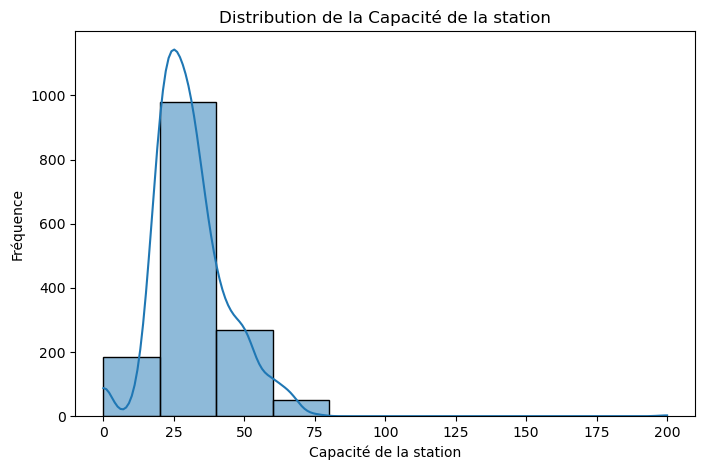

DeltaGenerator()

In [160]:
# Histogramme de la Capacité de la station
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(df['capacity'], bins=10, kde=True, ax=ax)
ax.set_title('Distribution de la Capacité de la station')
ax.set_xlabel('Capacité de la station')
ax.set_ylabel('Fréquence')
plt.show()
st.pyplot(fig)

### Diagrammes circulaires (Pie charts)

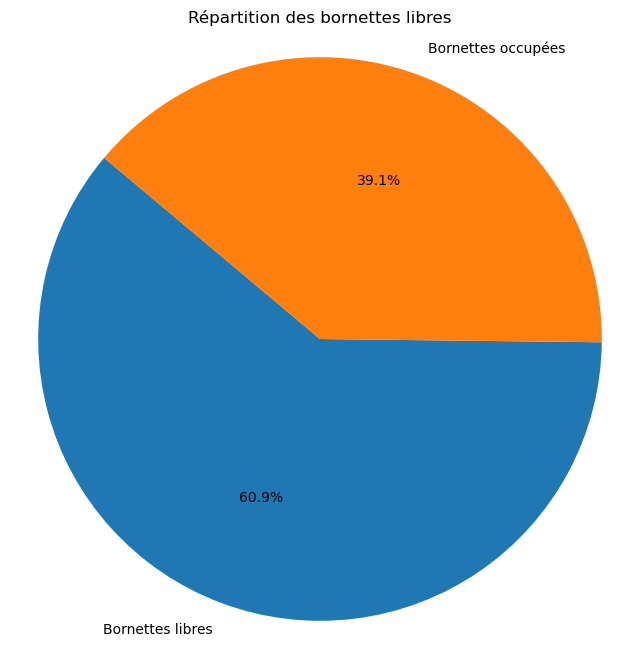

DeltaGenerator()

In [98]:
# Diagramme circulaire de la répartition des bornettes libres
fig2 = plt.figure(figsize=(8, 8))
labels = ['Bornettes libres', 'Bornettes occupées']
sizes = [df['numdocksavailable'].sum(), df['capacity'].sum() - df['numdocksavailable'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des bornettes libres')
plt.axis('equal')
plt.show()
st.pyplot(fig2)

### Diagrammes de dispersion (Scatter plots)

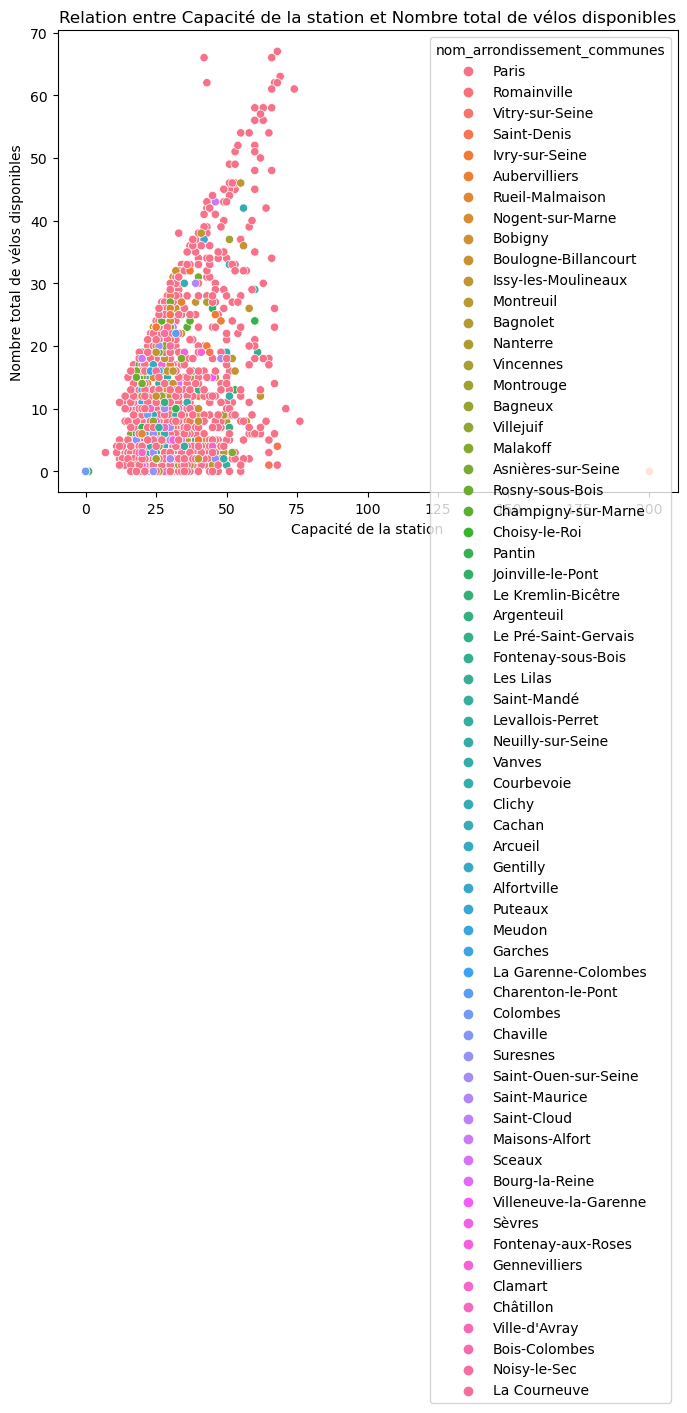

DeltaGenerator()

In [99]:
# Diagramme de dispersion entre Capacité de la station et Nombre total de vélos disponibles
fig3 = plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='capacity', y='numbikesavailable', hue='nom_arrondissement_communes', sizes=(20, 100), legend='auto')
plt.title('Relation entre Capacité de la station et Nombre total de vélos disponibles')
plt.xlabel('Capacité de la station')
plt.ylabel('Nombre total de vélos disponibles')
plt.show()
st.pyplot(fig3)

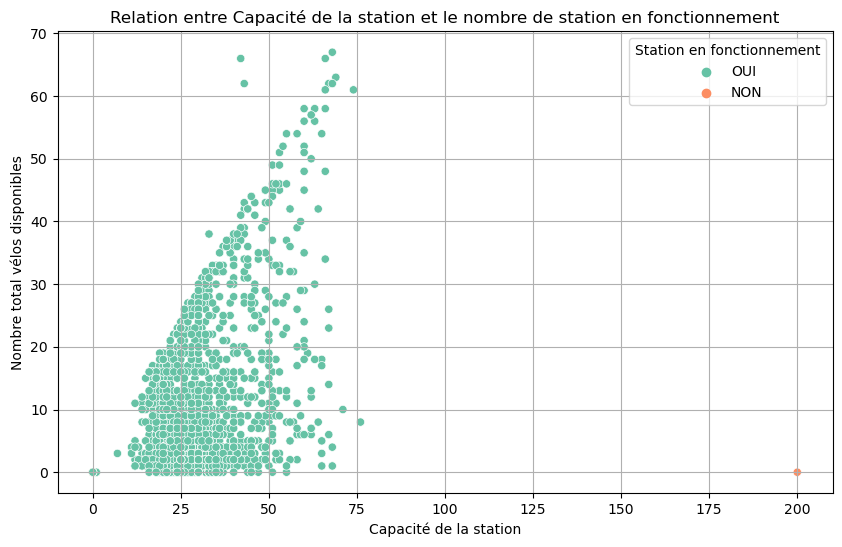

DeltaGenerator()

In [100]:
# Exemple : Relation entre Capacité de la station et Nombre total vélos disponibles
fig3, ax = plt.subplots(figsize=(10, 6))

# Création du diagramme de dispersion
sns.scatterplot(x='capacity', y='numbikesavailable', data=df, hue='is_installed', palette='Set2', ax=ax)
ax.set_title('Relation entre Capacité de la station et le nombre de station en fonctionnement')
ax.set_xlabel('Capacité de la station')
ax.set_ylabel('Nombre total vélos disponibles')
ax.legend(title='Station en fonctionnement')
ax.grid(True)
plt.show()

# Affichage du graphique dans Streamlit
st.pyplot(fig)

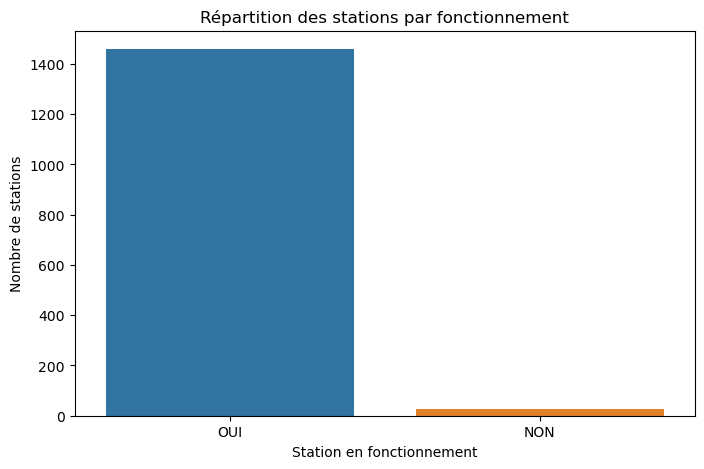

DeltaGenerator()

In [105]:
# Exemple pour la distribution de Station en fonctionnement
fig4, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='is_installed', data=df, ax=ax)
ax.set_title('Répartition des stations par fonctionnement')
ax.set_xlabel('Station en fonctionnement')
ax.set_ylabel('Nombre de stations')
plt.show()
st.pyplot(fig4)

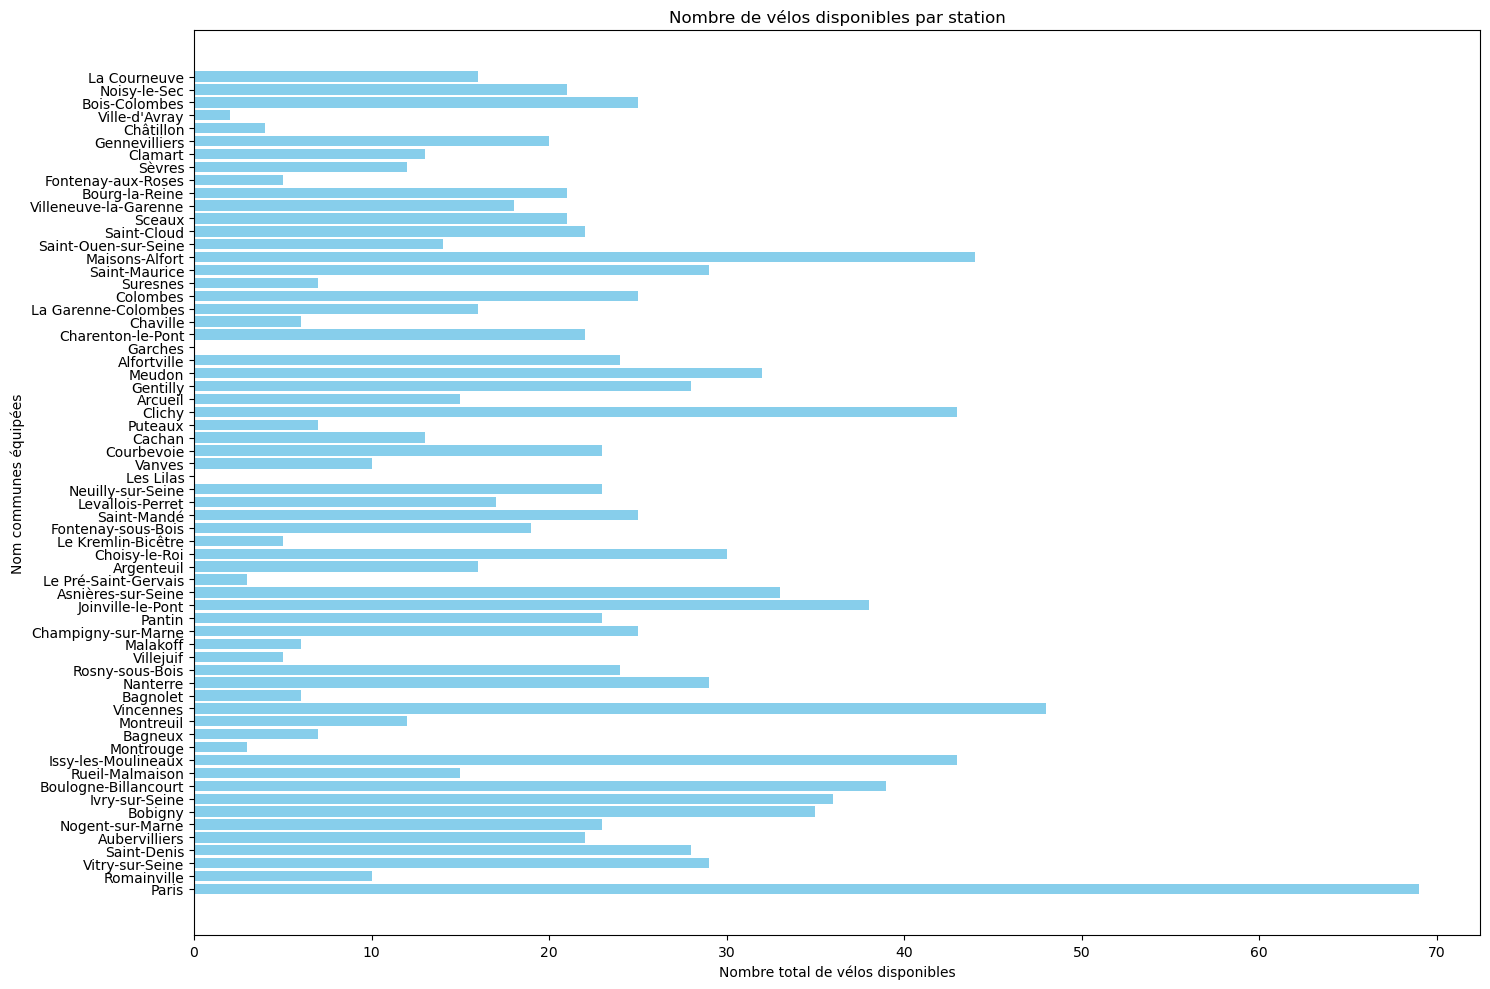

In [111]:
# Sélection des colonnes pour la visualisation
stations = df['nom_arrondissement_communes']  # Assumant que 'Nom communes équipées' contient les noms des stations
vélos_disponibles = df['numbikesavailable']

fig5, ax1 = plt.subplots(figsize=(15, 10))
ax1.barh(stations, vélos_disponibles, color='skyblue')
ax1.set_xlabel('Nombre total de vélos disponibles')
ax1.set_ylabel('Nom des communes ')
ax1.set_title('Nombre de vélos disponibles par station')

# Assurez un layout compact
plt.tight_layout()

# Affichage du graphique
st.pyplot(fig5)

# Affichage du graphique
plt.show()


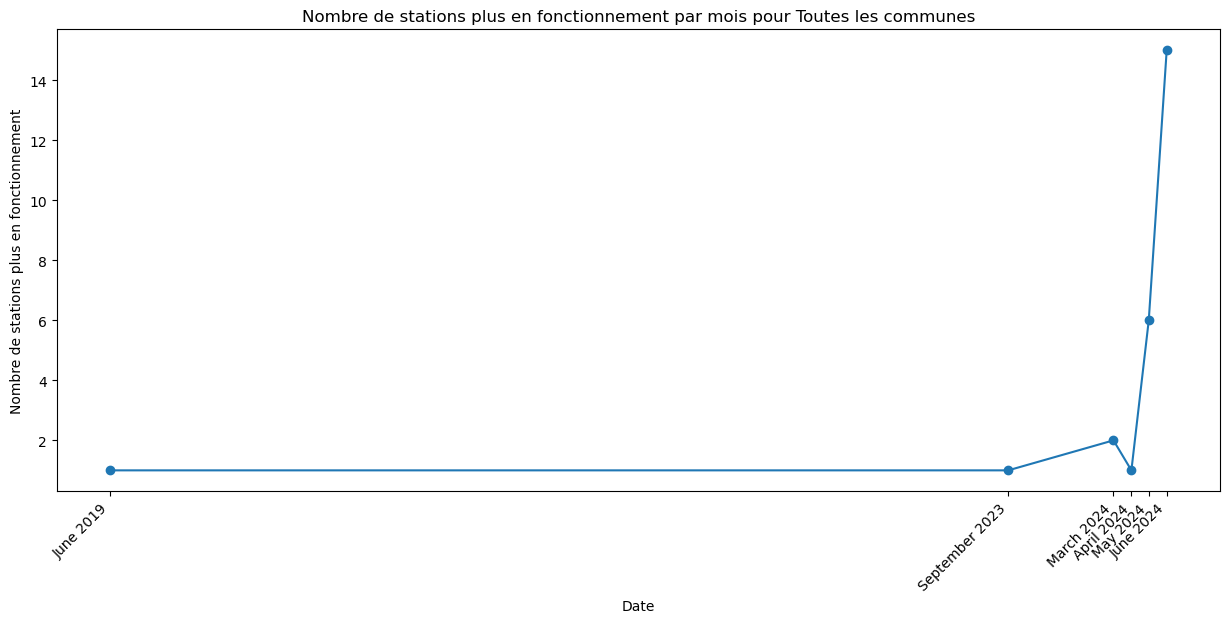

DeltaGenerator()

In [123]:
df['duedate'] = pd.to_datetime(df['duedate'], format='%d %B %Y %H:%M', utc=True).dt.tz_localize(None)

# Filtrer les stations qui ne sont pas en service
df_not_installed = df[df['is_installed'] == "NON"].copy()

# Extraire les mois et années des dates des dernières actualisations
df_not_installed['year_month'] = df_not_installed['duedate'].dt.to_period('M')

# Filtre pour sélectionner la commune ou toutes les communes
communes = ['Toutes les communes'] + df_not_installed['nom_arrondissement_communes'].unique().tolist()
selected_commune = st.selectbox('Sélectionnez la commune', options=communes)

# Filtrer les données si une commune est sélectionnée
if selected_commune != 'Toutes les communes':
    df_not_installed = df_not_installed[df_not_installed['nom_arrondissement_communes'] == selected_commune]

# Compter le nombre de stations non en service par mois et par année
updates_per_month = df_not_installed['year_month'].value_counts().sort_index()

# Convertir les périodes en timestamps pour le formatage littéraire
updates_per_month.index = updates_per_month.index.to_timestamp()

# Création du graphique temporel
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(updates_per_month.index, updates_per_month.values, marker='o', linestyle='-')
ax.set_xlabel('Date')
ax.set_ylabel('Nombre de stations plus en fonctionnement')
ax.set_title(f'Nombre de stations plus en fonctionnement par mois pour {selected_commune}')

# Formater les étiquettes de l'axe des x en mois et années littéraires
ax.set_xticks(updates_per_month.index)
ax.set_xticklabels(updates_per_month.index.strftime('%B %Y'), rotation=45, ha='right')
plt.show()

# Affichage du graphique
st.pyplot(fig6)

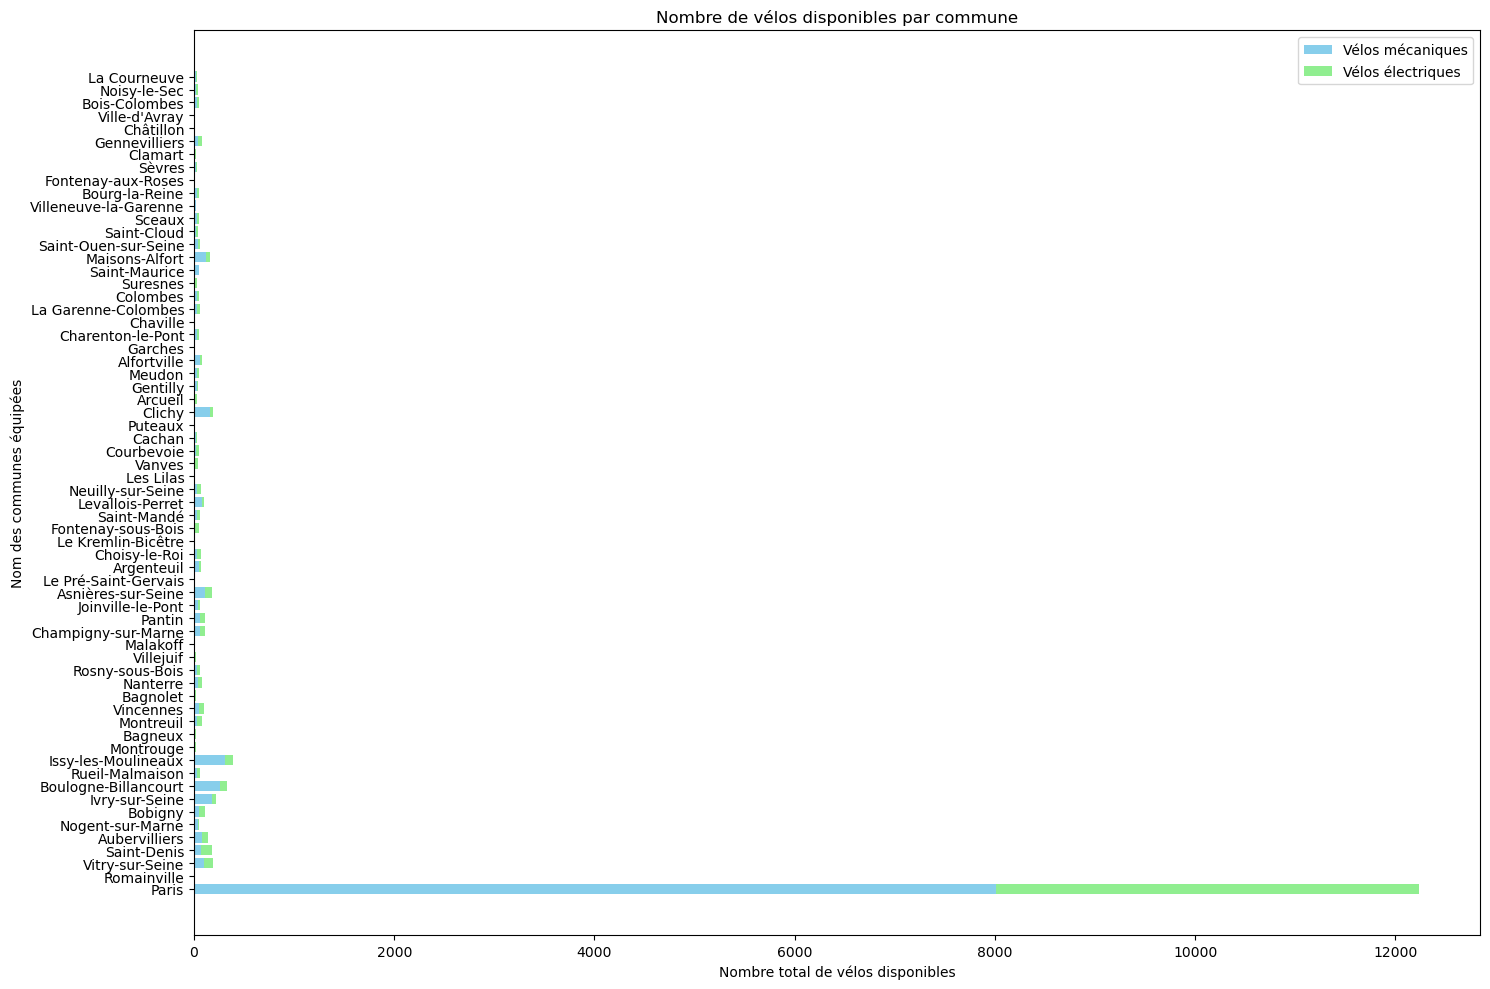

DeltaGenerator()

In [128]:
# Créer des filtres interactifs
villes = st.multiselect('Sélectionnez les villes', options=df['nom_arrondissement_communes'].unique(), default=df['nom_arrondissement_communes'].unique())
types_velos = st.multiselect('Sélectionnez le type de vélos', options=['mechanical', 'ebike'], default=['mechanical', 'ebike'])

# Filtrer les données en fonction des sélections
df_filtered = df[df['nom_arrondissement_communes'].isin(villes)]

# Créer le graphique
fig7, ax = plt.subplots(figsize=(15, 10))

# Afficher les barres divisées pour chaque ville
for ville in villes:
    data_ville = df_filtered[df_filtered['nom_arrondissement_communes'] == ville]
    if 'mechanical' in types_velos:
        ax.barh(ville, data_ville['mechanical'].sum(), color='skyblue', label='Vélos mécaniques' if ville == villes[0] else "")
    if 'ebike' in types_velos:
        ax.barh(ville, data_ville['ebike'].sum(), left=data_ville['mechanical'].sum() if 'mechanical' in types_velos else 0, color='lightgreen', label='Vélos électriques' if ville == villes[0] else "")

# Réglages des axes et des titres
ax.set_xlabel('Nombre total de vélos disponibles')
ax.set_ylabel('Nom des communes équipées')
ax.set_title('Nombre de vélos disponibles par commune')
ax.legend()

plt.tight_layout()
plt.show()

# Afficher le graphique dans Streamlit
st.pyplot(fig7)